Part 2: Optimization Functions

In [ ]:
## Machine Learning - Exercise 2: Linear Regression

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on optimization functions
#
#   
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s
	

#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/SE-807 Machine Learning Assignment # 2 Dr Wajahat Hussain/ex2data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Optimization Functions

In [ ]:
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

from pylab import * #all functions loaded to local namespace
from numpy import *
from numpy.random import normal  # generates a sample of numbers drawn from the normal distribution
from scipy.optimize import fmin_cg

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]



In [ ]:
m = Y.shape[0]
X = np.stack([np.ones(m), X], axis=1)
print(X)

Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 90
         Function evaluations: 172


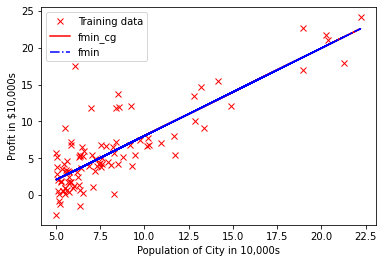

In [ ]:
args = (X,Y)  # parameter values
m=len(X)
al=1
lr2=[]


#--------  COST FUNCTION-------------
def J(t,x,y):
  theta=t
  ########### YOUR COST FUNCTION CODE HERE ###########
  J = (1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))


  ################################################
  lr2.append(J)
  return J


# -----------GRADIENT ONLY FUNCTION-----------
def gradf(t,y, *args):
  theta =t
  ########### GRADIENT ONLY CODE HERE ###########
  theta = (1/m)*(np.dot(X,theta)-Y).dot(X)

  


 ###################################################
  #lr2.append(J)
  return theta

x0 = [0,0]  # Initial guess.
from scipy import optimize                            #X0 IS A user-supplied initial estimate of xopt, 
                                                      # Fprime is a fn that returns the grad of f at x. We have given it equal to gradf # args are the arguments [X,Y]
res1 = optimize.fmin_cg(J, x0, fprime=gradf,args=args) #Minimize a function using a nonlinear conjugate gradient algorithm. 
lr1=list(lr2)

lr2=[]
res2 = optimize.fmin(J, x0, args=args) #Minimize a function using the downhill simplex algorithm.

plot(X[:,1],Y,'rx', X[:,1],np.dot(X, res1),'r', X[:,1], np.dot(X, res2),'b-.') #one scatter plot with red x, one line red one line blue (linear fit)
plt.ylabel('Profit in $10,000s'); # Set the y ? axis label
plt.xlabel('Population of City in 10,000s'); # Set the x ? axis label
plt.legend([ 'Training data','fmin_cg','fmin']);
plt.show()

Learning rates

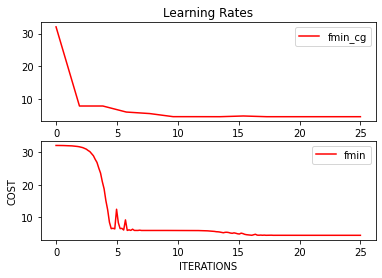

In [ ]:
# plot learning rates of fmin and fmin_cg
xx = linspace(0,25,len(lr1))
xy = linspace(0,25,len(lr2))
plt.subplot(2,1,1)

plt.title("Learning Rates")
 
plt.plot( xx,lr1,'r',label='fmin_cg') # (lr1) learning rate 1 of fmin
plt.legend()
plt.subplot(2,1,2)
plt.plot( xy,lr2,'r',label='fmin')  # (lr2)  learning rate 1 of fmin_cg
plt.ylabel('COST'); # Set the y  axis label
plt.xlabel('ITERATIONS'); # Set the x  axis label 
plt.legend() 
show()

Fitting second Order Polynomial through dataset.

The cost is 32.072733877455676
[0.01544231 0.08745197 0.05184516]


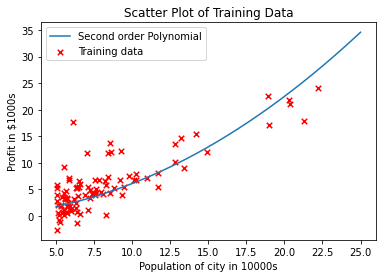

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

def plotdata(X,Y):                       # function def
  # plotting points as a scatter plot 
 ########### YOUR CODE HERE ###########
 #copy the code of plotdata function from ex2P1 and paste here 
  plt.scatter(X, Y, color= "red", marker= "x", s=30)
  plt.xlabel('Population of city in 10000s') 
  plt.ylabel('Profit in $1000s') 
  plt.title('Scatter Plot of Training Data')


 ######################################
  return

def computeCostVectorize(X,y , theta):
  m = y.size
  theta_2 = np.zeros(3)
  theta_3 = np.zeros(4)
  J = 0    # You need to return this parameter correctly
  if np.shape(X) == (97,3):
    theta = theta_2
  elif np.shape(X) == (97,4):
    theta = theta_3 
  h = np.dot(X, theta)
  ############ YOUR Vectorize COST FUNCTION J HERE ###########
  # Use vectorize implemntation. (without using loop)
  J = (1/(2*m))*np.sum(np.square(h-y))


 ############################################################
  return J

## ======================= Vectorize Gradient Descent =======================

def gradientDescentVectorize(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  #if np.shape(X) == (97,3):
    #theta = theta_2
  #elif np.shape(X) == (97,4):
    #theta = theta_3
  
  grad = (1/m)*(np.dot(X,theta)-y).dot(X)
  theta = theta - grad*alpha
  J_history = []
 
  for i in range(num_iters):
    ########### YOUR Vectorize GRADIENT DESCENT "theta" HERE ###########
    #vactorize implementation (without looping through training data)
    grad = (1/m)*(np.dot(X,theta)-Y).dot(X)
    theta = theta - alpha*grad


    ######################################################
    J_history.append(computeCostVectorize(X, y, theta))  
  return theta, J_history

X, Y = data[:, 0], data[:, 1]
m=len(data)
X=np.stack([np.ones(m),X, np.power(X,2)],axis=1)

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0]))
print("The cost is",cost )

theta_2 = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.00001

theta_2, J_history = gradientDescentVectorize(X ,Y, theta_2, alpha, iterations) 
print(theta_2)
# plot the 2nd Order fit
plotdata(X[:, 1],Y)
p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_2))  
plt.legend([ 'Second order Polynomial','Training data',]);

Fitting third Order Polynomial through same dataset.

(97, 4)
The cost is 32.072733877455676
[4.39699139e-05 3.13552441e-04 1.95039396e-03 2.74156825e-03]


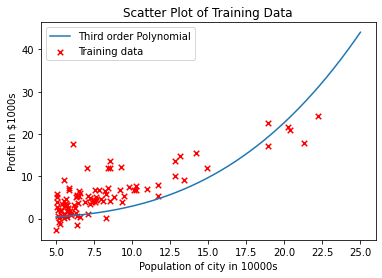

In [ ]:
X, Y = data[:, 0], data[:, 1]
m=len(data)

X=np.stack([np.ones(m),X, np.power(X,2),np.power(X,3)],axis=1)
print(np.shape(X))

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0,0.0]))
print("The cost is",cost )

theta_3 = np.zeros(4)

# some gradient descent settings
iterations = 1500
alpha = 0.00000001

theta_3, J_history = gradientDescentVectorize(X ,Y, theta_3, alpha, iterations) 
print(theta_3)
# plot the 3rd order polynomial fit
plotdata(X[:, 1],Y)

p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2),np.power(p,3)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_3)) 

plt.legend([ 'Third order Polynomial','Training data',]);